In [1]:
# COMPUTE METRIC FOR SHARED LEXICAL ITEMS FOR LANGUAGES PAIRWISE, OUTPUT: SIMILARITY MATRIX

In [97]:
from crawled_data import CrawledData
from collections import Counter
from itertools import combinations
import pandas as pd
import math
import json
import string
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [98]:
# READ DATA

In [99]:
data_obj = CrawledData("../data/crawled/folksongs/")
data_obj.read_crawled_data(remove_punctuation = True)
acc_data = dict()
for lang in data_obj.data:
    acc_data[lang] = " ".join([data_obj.data[lang][file_id]["text"] for file_id in data_obj.data[lang]])

In [100]:
# ORDERING LANGUAGES ROUGHLY FROM WEST TO EAST

In [234]:
langs = [
"rajasthani",
"punjabi",
"hariyanvi",
# "gujarati",
"khadi_boli",
# "sanskrit",
# "hindi",
# "bhil",
# "koraku",
# "baiga",
# "nimaadi",
# "malwi",
# "marathi",
# "bhadavari",
# "himachali",
# "garwali",
# "kumaoni",
"kannauji",
"brajbhasha",
"bundeli",
"awadhi",
"chattisgarhi",
"bhojpuri",
"magahi",
"angika",
"bangla"
        ]
for idx, lang in enumerate(langs):
    print(idx, lang)

0 rajasthani
1 punjabi
2 hariyanvi
3 khadi_boli
4 kannauji
5 brajbhasha
6 bundeli
7 awadhi
8 chattisgarhi
9 bhojpuri
10 magahi
11 angika
12 bangla


In [235]:
# len(acc_data["gujarati"])

In [236]:
# SIMILARITY MATRIX: THE SIMILARITY METRIC USED IS |S|/(|L_1|+|L_2|) WHERE S IS THE SHARED LEXICON OF 2 LANGUAGE
# LEXICONS L_1 AND L_2

In [237]:
N = len(langs)
shared_lex_metrics = [[0]*N for _ in range(N)]
shared_lex_dict = {lang:dict() for lang in langs}

for i, j in combinations(range(N), 2):
    l_1, l_2 = langs[i], langs[j]
    lex_l_1, lex_l_2 = set(acc_data[l_1].split()), set(acc_data[l_2].split())
#     print("CALCULATING FOR LANGS {}: SIZE {} and {}: SIZE {}".format(l_1, len(lex_l_1), l_2, len(lex_l_2)))
    shared_lex = lex_l_1.intersection(lex_l_2)
#     print("SHARED VOCABULARY: {}".format(len(shared_lex)))
#     print(list(shared_lex)[:100])
    shared_lex_metrics[i][j] = 2*len(shared_lex)/(len(lex_l_1) + len(lex_l_2))
    shared_lex_metrics[j][i] = 2*len(shared_lex)/(len(lex_l_1) + len(lex_l_2))
    
    shared_lex_dict[l_1][l_2] = 2*len(shared_lex)/(len(lex_l_1) + len(lex_l_2))
    shared_lex_dict[l_2][l_1] = 2*len(shared_lex)/(len(lex_l_1) + len(lex_l_2))

shared_lex_metrics = np.asarray(shared_lex_metrics)
max_sim = max(shared_lex_metrics.flatten())
    
for i in range(N):
    shared_lex_metrics[i][i] = 1
    shared_lex_dict[langs[i]][langs[i]] = 1

In [238]:
# with open("stats_outputs/lexical_similarity/pairwise_lex_similarity.json", "w") as f:
#     json.dump(shared_lex_dict, f, indent = 2, ensure_ascii = False)

In [239]:
#MANUAL NORMALIZATION - replaced by setting vmax and masking

# print(max_sim)
# for i in range(N):
#     for j in range(N):
#         if i==j:
#             shared_lex_metrics[i][j] = 1
#         else:
#             shared_lex_metrics[i][j] /= max_sim

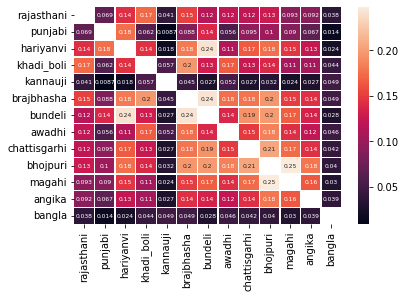

In [242]:
ax = sns.heatmap(shared_lex_metrics, linewidth=0.3, mask = shared_lex_metrics == 1, vmax = max_sim, xticklabels=langs, yticklabels=langs, annot=True, annot_kws={"size":6})

# plt.()
fig = ax.get_figure()
fig.savefig("stats_outputs/lexical_similarity/central_north.png")

In [153]:
len(set(acc_data["baiga"].split()).intersection(set(acc_data["bhil"].split())))

1105

In [174]:
for lang in acc_data:
    print(lang, len(set(acc_data[lang].split())))

rajasthani 2041
gujarati 472
himachali 227
magahi 6621
awadhi 2083
punjabi 15139
koraku 2279
baiga 3139
nimaadi 4037
khadi_boli 1478
hindi 33
bhojpuri 4807
garwali 9333
chattisgarhi 4543
brajbhasha 2906
bhil 5571
sanskrit 165
angika 4145
hariyanvi 9129
kannauji 233
bundeli 8033
bangla 462
malwi 2885
marathi 732
kumaoni 445
bhadavari 276
